## EN2550 - ASSIGNMENT 01
### 190713X - L.H.N. WIJEWARDENA

#### Question 1

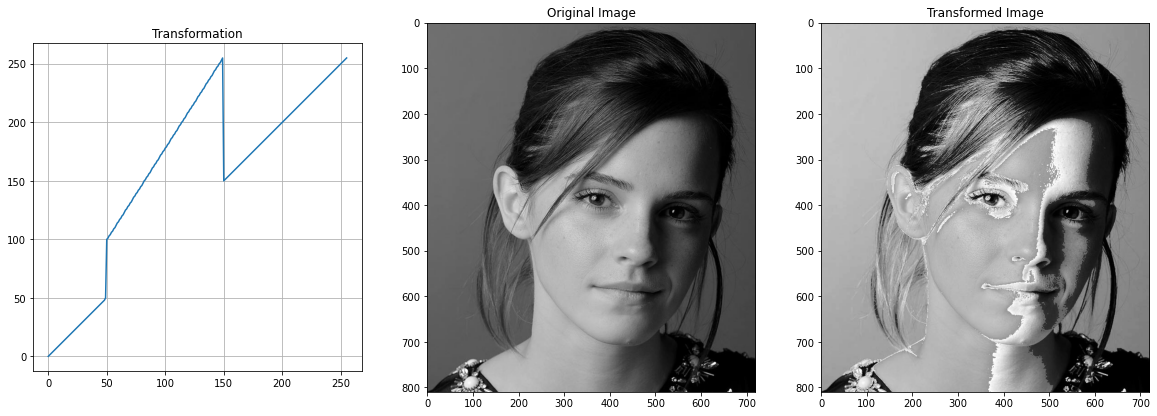

In [80]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

old = cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert old is not None

t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(t)
ax[0].set_title("Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(t) == 256
g = cv.LUT(old,t)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()


#### Question 2
a) - White matter

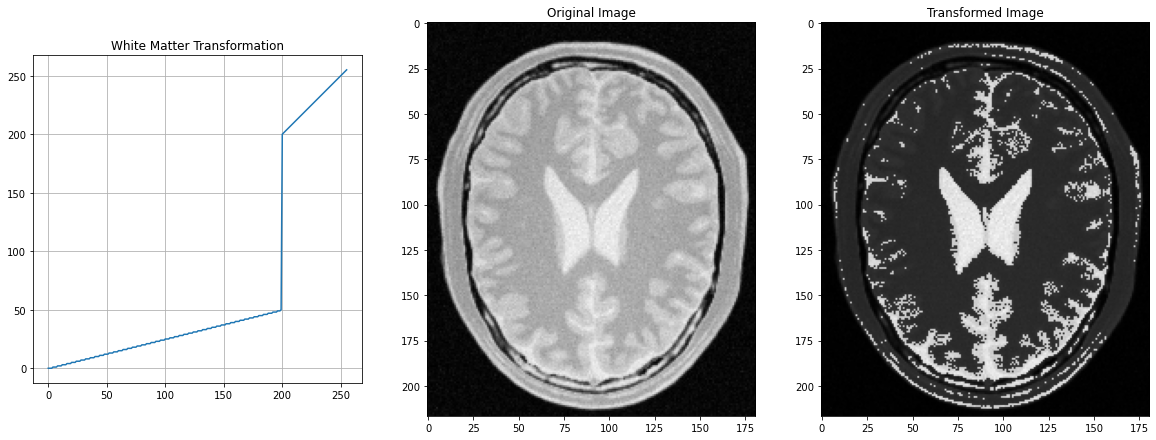

In [69]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

old = cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert old is not None

tw_1=np.linspace(0,50,200)
tw_2=np.linspace(200,255,56)
#tw_3=np.linspace(150,255,106)

tw = np.concatenate((tw_1,tw_2),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tw)
ax[0].set_title("White Matter Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(tw) == 256
g = cv.LUT(old,tw)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()



b) - Black Matter

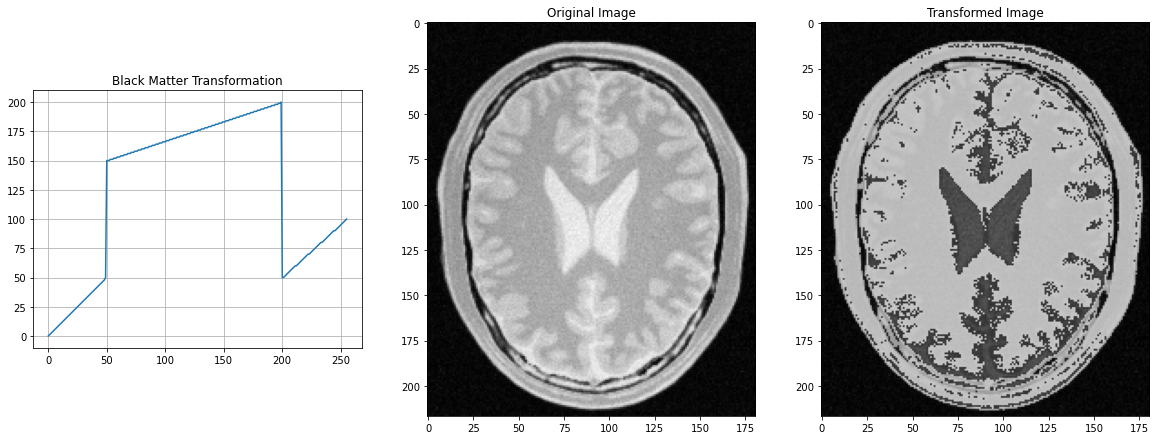

In [88]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

old = cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert old is not None

tb_1=np.linspace(0,50,50)
tb_2=np.linspace(150,200,150)
tb_3=np.linspace(50,100,56)

tb = np.concatenate((tb_1,tb_2,tb_3),axis=0).astype(np.uint8)
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tb)
ax[0].set_title("Black Matter Transformation")
ax[0].set_aspect('equal')
ax[0].grid(True)
assert len(tb) == 256
g = cv.LUT(old,tb)

old_img = cv.cvtColor(old, cv.COLOR_GRAY2RGB)
ax[1].imshow(old_img)
ax[1].set_title("Original Image")

img = cv.cvtColor(g, cv.COLOR_GRAY2RGB)
ax[2].imshow(img)
ax[2].set_title("Transformed Image")
plt.show()

#### Question 3

#### Question 4

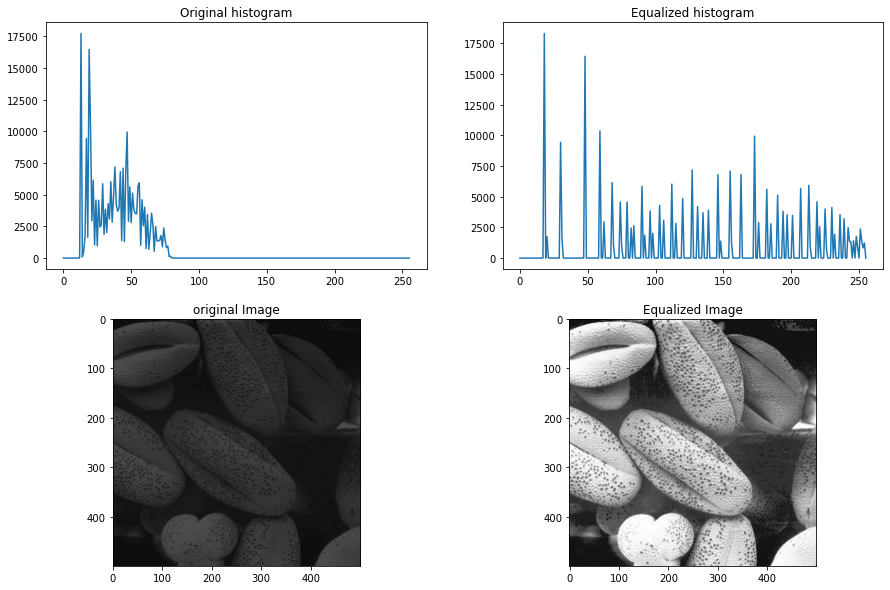

In [23]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
first = cv . imread ( r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\shells.png", cv . IMREAD_GRAYSCALE )
assert first is not None


def histeq(img):
    hist =  cv.calcHist([img],[0],None,[256],[0,256])
    cdf=hist.cumsum()
    sk = np.uint8(255 * (cdf-np.min(cdf))/(np.max(cdf)-np.min(cdf)))
    s1, s2 = img.shape
    Y = np.zeros_like(img)
    for i in range(0, s1):
	    for j in range(0, s2):
		    Y[i, j] = sk[img[i, j]]
    return Y   

hist_f = cv.calcHist([first],[0],None,[256],[0,256])
equalized=histeq(first) 
hist_e=  cv.calcHist([equalized],[0],None,[256],[0,256])

fig,ax=plt.subplots(2,2,figsize=(15,10))
ax[0][0].plot(hist_f)
ax[0][0].set_title("Original histogram")
ax[0][1].plot(hist_e)
ax[0][1].set_title("Equalized histogram")

fplot = cv.cvtColor(first, cv.COLOR_BGR2RGB)
ax[1][0].imshow(fplot)
ax[1][0].set_title("original Image")


gplot = cv.cvtColor(equalized, cv.COLOR_BGR2RGB)
ax[1][1].imshow(gplot)
ax[1][1].set_title("Equalized Image")

plt.show()

#### Question 5

#### Question 6
a) - Using filter 2D

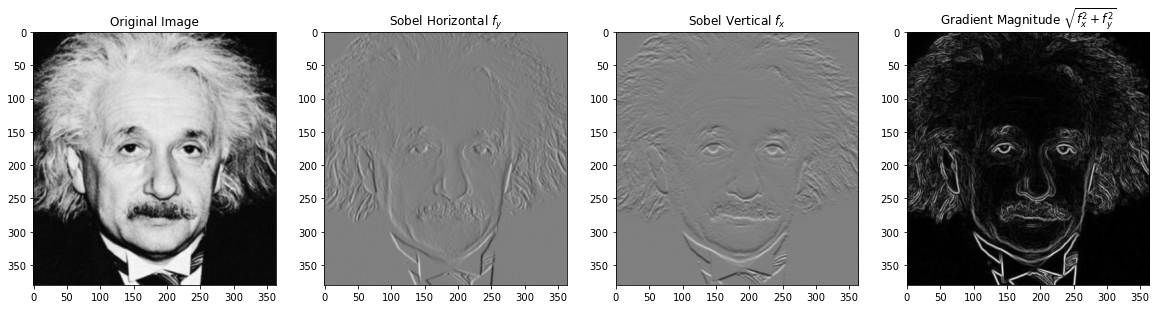

In [34]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

f= cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v=  np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=float)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=float)

f_y= cv.filter2D(f , -1 , sobel_h)
f_x= cv.filter2D(f , -1 , sobel_v)
grad_mag = np.sqrt(f_x**2 + f_y**2)

fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(f, cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original Image")

ax[1].imshow(f_y, cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

ax[2].imshow(f_x, cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Vertical $f_x$")

ax[3].imshow(grad_mag, cmap="gray")
ax[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$")

plt.show()

b) - Function for sobel filtering

In [48]:
def convolution2d(image, kernel):
    m, n = np.shape(kernel)
    x, y = np.shape(image)
    newimage=np.pad(image, ((m//2, m//2), (n//2, n//2)),'constant', constant_values=(0,0) )
    out_image = np.zeros((np.shape(image)))
    kernel = np.flipud(np.fliplr(kernel))
    
    for i in range(y):
        for j in range(x):
            out_image[j][i] =  np.sum(newimage[j:j+m, i:i+n]*kernel) 
   
    return out_image

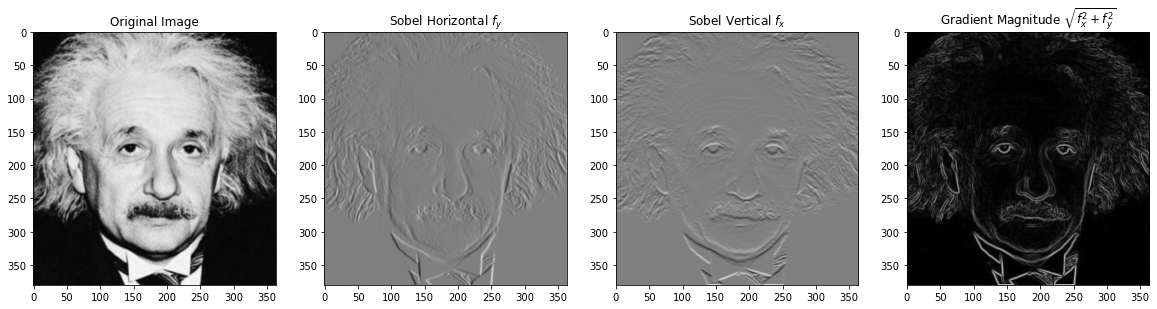

In [49]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

f= cv.imread(r"C:\Users\HIRUNI\Desktop\EN2550\EN2550\Assignment 1\einstein.png",cv.IMREAD_GRAYSCALE).astype(np.float32)
assert f is not None

sobel_v=  np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=float)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=float)

f_y= convolution2d(f,sobel_h)
f_x= convolution2d(f , sobel_v)

grad_mag = np.sqrt(f_x**2 + f_y**2)

fig,ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(f, cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original Image")

ax[1].imshow(f_y, cmap="gray",vmin=-1020,vmax=1020)
ax[1].set_title("Sobel Horizontal $f_y$")

ax[2].imshow(f_x, cmap="gray",vmin=-1020,vmax=1020)
ax[2].set_title("Sobel Vertical $f_x$")

ax[3].imshow(grad_mag, cmap="gray")
ax[3].set_title("Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$")

plt.show()